# 4. Redes Neuronales Artificiales

## 4.1 Redes neuronales de una capa

### 4.1.1 Implementación de ADALINE en Python

In [1]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits ()
X, Y = digits .data , digits.target

In [2]:
from sklearn . model_selection import train_test_split
Y[(Y==1)+(Y==2)+(Y==3)+(Y==4)+(Y==5)+(Y==6)+(Y==7)+(Y==8)+(Y==9)] = -1
Y[Y==0] = 1

X_train , X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.4)

In [3]:
X_train = np.concatenate ([np. ones (( X_train . shape [0],1)), X_train ], axis =1)
X_test = np.concatenate ([np. ones (( X_test . shape [0],1)), X_test ], axis =1)

In [4]:
N_ITER = 30000
lr = 0.0005
n = float ( X_train.shape [0])
w = np.random.randn (65)

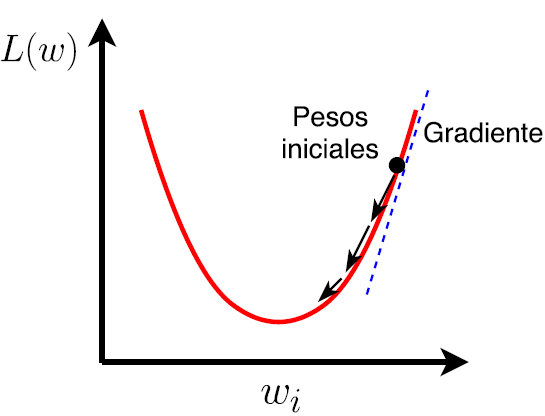

Usaremos gradient descent para optimizar los pesos de nuestra neurona ADALINE. La idea fundamental de esta técnica consiste en calcular las derivadas parciales de la función de error respecto a cada peso para modificarlos el la dirección opuesta, buscando así de forma iterativa un mínimo en la función de error. Recuerda que el valor de una derivada de una función en un punto puede interpretarse como la pendiente de la recta tangencial a la función derivada en ese punto (ver figura).

In [5]:
#Ejecutamos N_ITER iteraciones de gradient descent, con un learning rate (alpha) igual a la variable lr  

for i in range ( N_ITER ):
    z = np.dot( X_train , w)
    gradient = -np.dot (( Y_train - z).ravel () , X_train )/n
    dw = -lr*gradient
    w = w+dw

En cada iteración, calculamos el vector de gradientes y actualizamos los pesos de nuestra neurona en la dirección opuesta:

 $\large \Delta w = -\alpha \cdot \nabla _w L = -\alpha \cdot \left [\frac{\partial L}{\partial w_0}, \cdots, \frac{\partial L}{\partial w_d}\right ]$
 
 donde 
 $\large \frac{\partial L}{\partial w_i} = - \frac{1}{n} \sum_{j=1}^n (y^{(j)}- z(x^{(j)}))~x^{(j)}_i$

 $\large w := w + \Delta w  $

In [6]:
from sklearn . metrics import accuracy_score

y_ = np. sign (np.dot( X_test , w))
print (accuracy_score (Y_test , y_)) 

0.990264255911


## 4.2 Red multi-clase de una capa

### 4.2.1 Implementación de redes multi-clase de una capa en Python

In [7]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.metrics import accuracy_score
digits = load_digits ()
X, Y = digits .data , digits.target

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.4)
X_train = np.concatenate ([np.ones (( X_train.shape [0],1)), X_train ], axis =1)
X_test = np.concatenate ([np.ones (( X_test.shape [0],1)), X_test ], axis =1)

In [9]:
Y_train_ohe = -np.ones (( Y_train.shape [0], 10))
Y_test_ohe = -np.ones (( Y_test.shape [0], 10))

for i in range ( Y_train.shape [0]):
    Y_train_ohe [i, Y_train [i]] = 1
for i in range ( Y_test.shape [0]):
    Y_test_ohe [i, Y_test [i]] = 1

In [10]:
N_ITER = 50000
lr = 0.00001
n_neurons = 10
n = float ( X_train . shape [0])
W = np. random . randn (65 , n_neurons )/100.

In [11]:
for i in range ( N_ITER ):
    z = np.dot( X_train , W)
    gradient = -np. dot( X_train .T, ( Y_train_ohe -z))/n
    dw = -lr* gradient
    W = W+dw

In [12]:
y = np.dot( X_test , W)

In [13]:
from sklearn . metrics import accuracy_score

y = np. argmax (y, axis =1)
accuracy_score (y, Y_test ) 

0.94436717663421421

## 4.3 El perceptrón Multicapa

### 4.3.1 Perceptrón Multicapa en Keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_digits

import numpy as np

data = load_digits()
X = data["data"]
Y = data["target"]

Using TensorFlow backend.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4)

Y_train_ohe = np.zeros((Y_train.shape[0], 10))
Y_test_ohe = np.zeros((Y_test.shape[0], 10))

for i in range(Y_train.shape[0]):
    Y_train_ohe[i, Y_train[i]] = 1
    
for i in range(Y_test.shape[0]):
    Y_test_ohe[i, Y_test[i]] = 1

In [16]:
model = Sequential()

model.add(Dense(100, input_dim=64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [17]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train_ohe, nb_epoch=3000, batch_size=32)

C:\Users\lopelh\Anaconda2\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3000
1078/1078 [==============================] - 0s 84us/step - loss: 0.0954 - acc: 0.0816
Epoch 2/3000
1078/1078 [==============================] - 0s 77us/step - loss: 0.0949 - acc: 0.0826
Epoch 3/3000
1078/1078 [==============================] - 0s 76us/step - loss: 0.0945 - acc: 0.0798
Epoch 4/3000
1078/1078 [==============================] - 0s 75us/step - loss: 0.0941 - acc: 0.0798
Epoch 5/3000
1078/1078 [==============================] - 0s 75us/step - loss: 0.0938 - acc: 0.0807
Epoch 6/3000
1078/1078 [==============================] - 0s 77us/step - loss: 0.0935 - acc: 0.0807
Epoch 7/3000
1078/1078 [==============================] - 0s 78us/step - loss: 0.0932 - acc: 0.0826
Epoch 8/3000
1078/1078 [==============================] - 0s 83us/step - loss: 0.0929 - acc: 0.0863
Epoch 9/3000
1078/1078 [==============================] - 0s 76us/step - loss: 0.0926 - acc: 0.0946
Epoch 10/3000
1078/1078 [==============================] - 0s 83us/step - loss: 0.0924 - acc: 0.0946

1078/1078 [==============================] - 0s 96us/step - loss: 0.0586 - acc: 0.6670
Epoch 156/3000
1078/1078 [==============================] - 0s 112us/step - loss: 0.0584 - acc: 0.6679
Epoch 157/3000
1078/1078 [==============================] - 0s 135us/step - loss: 0.0582 - acc: 0.6698 0s - loss: 0.0595 - acc: 0.66
Epoch 158/3000
1078/1078 [==============================] - 0s 132us/step - loss: 0.0580 - acc: 0.6707
Epoch 159/3000
1078/1078 [==============================] - 0s 114us/step - loss: 0.0578 - acc: 0.6707
Epoch 160/3000
1078/1078 [==============================] - 0s 89us/step - loss: 0.0576 - acc: 0.6716
Epoch 161/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0583 - acc: 0.670 - 0s 86us/step - loss: 0.0575 - acc: 0.6725
Epoch 162/3000
1078/1078 [==============================] - 0s 122us/step - loss: 0.0573 - acc: 0.6744
Epoch 163/3000
1078/1078 [==============================] - 0s 149us/step - loss: 0.0571 - acc: 0.6763 0s - loss: 0.0572 - acc

Epoch 231/3000
1078/1078 [==============================] - 0s 92us/step - loss: 0.0457 - acc: 0.8052
Epoch 232/3000
1078/1078 [==============================] - 0s 142us/step - loss: 0.0455 - acc: 0.8071
Epoch 233/3000
1078/1078 [==============================] - 0s 113us/step - loss: 0.0453 - acc: 0.8089
Epoch 234/3000
1078/1078 [==============================] - 0s 95us/step - loss: 0.0452 - acc: 0.8108
Epoch 235/3000
1078/1078 [==============================] - 0s 96us/step - loss: 0.0450 - acc: 0.8117
Epoch 236/3000
1078/1078 [==============================] - 0s 125us/step - loss: 0.0449 - acc: 0.8098
Epoch 237/3000
1078/1078 [==============================] - 0s 114us/step - loss: 0.0447 - acc: 0.8135
Epoch 238/3000
1078/1078 [==============================] - 0s 89us/step - loss: 0.0446 - acc: 0.8135
Epoch 239/3000
1078/1078 [==============================] - 0s 89us/step - loss: 0.0444 - acc: 0.8145
Epoch 240/3000
1078/1078 [==============================] - 0s 89us/step - los

1078/1078 [==============================] - 0s 81us/step - loss: 0.0350 - acc: 0.8599
Epoch 308/3000
1078/1078 [==============================] - 0s 96us/step - loss: 0.0349 - acc: 0.8609
Epoch 309/3000
1078/1078 [==============================] - 0s 82us/step - loss: 0.0348 - acc: 0.8618
Epoch 310/3000
1078/1078 [==============================] - 0s 92us/step - loss: 0.0347 - acc: 0.8627
Epoch 311/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0355 - acc: 0.846 - 0s 92us/step - loss: 0.0346 - acc: 0.8627
Epoch 312/3000
1078/1078 [==============================] - 0s 83us/step - loss: 0.0345 - acc: 0.8636
Epoch 313/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0343 - acc: 0.8636
Epoch 314/3000
1078/1078 [==============================] - 0s 76us/step - loss: 0.0342 - acc: 0.8646
Epoch 315/3000
1078/1078 [==============================] - 0s 69us/step - loss: 0.0341 - acc: 0.8646
Epoch 316/3000
1078/1078 [==============================] -

1078/1078 [==============================] - 0s 83us/step - loss: 0.0218 - acc: 0.9323
Epoch 463/3000
1078/1078 [==============================] - 0s 82us/step - loss: 0.0217 - acc: 0.9314
Epoch 464/3000
1078/1078 [==============================] - 0s 82us/step - loss: 0.0217 - acc: 0.9341
Epoch 465/3000
1078/1078 [==============================] - 0s 83us/step - loss: 0.0216 - acc: 0.9332
Epoch 466/3000
1078/1078 [==============================] - 0s 88us/step - loss: 0.0216 - acc: 0.9341
Epoch 467/3000
1078/1078 [==============================] - 0s 88us/step - loss: 0.0215 - acc: 0.9341
Epoch 468/3000
1078/1078 [==============================] - 0s 83us/step - loss: 0.0215 - acc: 0.9341
Epoch 469/3000
1078/1078 [==============================] - 0s 89us/step - loss: 0.0214 - acc: 0.9341
Epoch 470/3000
1078/1078 [==============================] - 0s 80us/step - loss: 0.0213 - acc: 0.9341
Epoch 471/3000
1078/1078 [==============================] - 0s 81us/step - loss: 0.0213 - acc: 0.

1078/1078 [==============================] - 0s 82us/step - loss: 0.0151 - acc: 0.9518
Epoch 618/3000
1078/1078 [==============================] - 0s 78us/step - loss: 0.0151 - acc: 0.9518
Epoch 619/3000
1078/1078 [==============================] - 0s 98us/step - loss: 0.0150 - acc: 0.9518
Epoch 620/3000
1078/1078 [==============================] - 0s 87us/step - loss: 0.0150 - acc: 0.9518
Epoch 621/3000
1078/1078 [==============================] - 0s 76us/step - loss: 0.0150 - acc: 0.9518
Epoch 622/3000
1078/1078 [==============================] - 0s 94us/step - loss: 0.0149 - acc: 0.9518
Epoch 623/3000
1078/1078 [==============================] - 0s 95us/step - loss: 0.0149 - acc: 0.9518
Epoch 624/3000
1078/1078 [==============================] - 0s 81us/step - loss: 0.0149 - acc: 0.9536
Epoch 625/3000
1078/1078 [==============================] - 0s 82us/step - loss: 0.0149 - acc: 0.9527
Epoch 626/3000
1078/1078 [==============================] - 0s 109us/step - loss: 0.0148 - acc: 0

1078/1078 [==============================] - 0s 61us/step - loss: 0.0115 - acc: 0.9685
Epoch 768/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0115 - acc: 0.9694
Epoch 769/3000
1078/1078 [==============================] - 0s 61us/step - loss: 0.0115 - acc: 0.9685: 0s - loss: 0.0113 - acc: 0.970
Epoch 770/3000
1078/1078 [==============================] - 0s 60us/step - loss: 0.0115 - acc: 0.9694: 0s - loss: 0.0114 - acc: 0.966
Epoch 771/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0114 - acc: 0.968 - 0s 58us/step - loss: 0.0114 - acc: 0.9685
Epoch 772/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0113 - acc: 0.967 - 0s 64us/step - loss: 0.0114 - acc: 0.9685
Epoch 773/3000
1078/1078 [==============================] - 0s 61us/step - loss: 0.0114 - acc: 0.9694: 0s - loss: 0.0114 - acc: 0.967
Epoch 774/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0112 - acc: 0.968 - 0s 59us/step - loss: 0.0114 - a

1078/1078 [==============================] - 0s 67us/step - loss: 0.0093 - acc: 0.9740
Epoch 912/3000
1078/1078 [==============================] - 0s 64us/step - loss: 0.0093 - acc: 0.9740
Epoch 913/3000
1078/1078 [==============================] - 0s 73us/step - loss: 0.0093 - acc: 0.9740: 0s - loss: 0.0095 - acc: 0.976
Epoch 914/3000
1078/1078 [==============================] - 0s 122us/step - loss: 0.0093 - acc: 0.9740
Epoch 915/3000
1078/1078 [==============================] - 0s 63us/step - loss: 0.0093 - acc: 0.9740
Epoch 916/3000
1078/1078 [==============================] - 0s 69us/step - loss: 0.0092 - acc: 0.9740: 0s - loss: 0.0087 - acc: 0.979
Epoch 917/3000
1078/1078 [==============================] - 0s 63us/step - loss: 0.0092 - acc: 0.9740
Epoch 918/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0092 - acc: 0.9740
Epoch 919/3000
1078/1078 [==============================] - 0s 62us/step - loss: 0.0092 - acc: 0.9740
Epoch 920/3000
1078/1078 [======

1078/1078 [==============================] - 0s 59us/step - loss: 0.0077 - acc: 0.9824
Epoch 1058/3000
1078/1078 [==============================] - 0s 65us/step - loss: 0.0077 - acc: 0.9824
Epoch 1059/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0076 - acc: 0.983 - 0s 56us/step - loss: 0.0077 - acc: 0.9824
Epoch 1060/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0078 - acc: 0.981 - 0s 58us/step - loss: 0.0077 - acc: 0.9824
Epoch 1061/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0077 - acc: 0.9824
Epoch 1062/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0077 - acc: 0.9824
Epoch 1063/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0077 - acc: 0.9824
Epoch 1064/3000
1078/1078 [==============================] - 0s 63us/step - loss: 0.0077 - acc: 0.9824
Epoch 1065/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0077 - acc: 0.9824
Epoch 1066/30

1078/1078 [==============================] - 0s 60us/step - loss: 0.0066 - acc: 0.9833
Epoch 1204/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0066 - acc: 0.9833
Epoch 1205/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0066 - acc: 0.9833
Epoch 1206/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0066 - acc: 0.982 - 0s 58us/step - loss: 0.0066 - acc: 0.9833
Epoch 1207/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0066 - acc: 0.983 - 0s 58us/step - loss: 0.0066 - acc: 0.9833
Epoch 1208/3000
1078/1078 [==============================] - 0s 59us/step - loss: 0.0066 - acc: 0.9833
Epoch 1209/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0065 - acc: 0.9833
Epoch 1210/3000
1078/1078 [==============================] - 0s 55us/step - loss: 0.0065 - acc: 0.9833
Epoch 1211/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0065 - acc: 0.9833
Epoch 1212/30

1078/1078 [==============================] - 0s 55us/step - loss: 0.0057 - acc: 0.9879
Epoch 1356/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0057 - acc: 0.9879
Epoch 1357/3000
1078/1078 [==============================] - 0s 51us/step - loss: 0.0057 - acc: 0.9879
Epoch 1358/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0057 - acc: 0.9879
Epoch 1359/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0057 - acc: 0.9879
Epoch 1360/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0057 - acc: 0.9879
Epoch 1361/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0057 - acc: 0.9879
Epoch 1362/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0057 - acc: 0.9879
Epoch 1363/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0056 - acc: 0.9879
Epoch 1364/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0056 

1078/1078 [==============================] - 0s 59us/step - loss: 0.0050 - acc: 0.9889
Epoch 1506/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0050 - acc: 0.9889
Epoch 1507/3000
1078/1078 [==============================] - 0s 53us/step - loss: 0.0050 - acc: 0.9889
Epoch 1508/3000
1078/1078 [==============================] - 0s 60us/step - loss: 0.0050 - acc: 0.9889
Epoch 1509/3000
1078/1078 [==============================] - 0s 74us/step - loss: 0.0050 - acc: 0.9889
Epoch 1510/3000
1078/1078 [==============================] - 0s 55us/step - loss: 0.0050 - acc: 0.9889: 0s - loss: 0.0050 - acc: 0.989
Epoch 1511/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0050 - acc: 0.9889
Epoch 1512/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0050 - acc: 0.9889
Epoch 1513/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0050 - acc: 0.9889
Epoch 1514/3000
1078/1078 [==============================

1078/1078 [==============================] - 0s 58us/step - loss: 0.0045 - acc: 0.9898
Epoch 1655/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0045 - acc: 0.9898
Epoch 1656/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0045 - acc: 0.9898
Epoch 1657/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0044 - acc: 0.9898
Epoch 1658/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0044 - acc: 0.9898
Epoch 1659/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0045 - acc: 0.988 - 0s 59us/step - loss: 0.0044 - acc: 0.9898
Epoch 1660/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0044 - acc: 0.990 - 0s 58us/step - loss: 0.0044 - acc: 0.9898
Epoch 1661/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0043 - acc: 0.991 - 0s 58us/step - loss: 0.0044 - acc: 0.9898
Epoch 1662/3000
1078/1078 [==============================] - 0s 60us/step - lo

1078/1078 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.990 - 0s 59us/step - loss: 0.0040 - acc: 0.9907
Epoch 1804/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0040 - acc: 0.9907
Epoch 1805/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0040 - acc: 0.9907
Epoch 1806/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0040 - acc: 0.9907
Epoch 1807/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0040 - acc: 0.9907
Epoch 1808/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0040 - acc: 0.9907
Epoch 1809/3000
1078/1078 [==============================] - 0s 59us/step - loss: 0.0040 - acc: 0.9907
Epoch 1810/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0040 - acc: 0.9907
Epoch 1811/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0040 - acc: 0.9907
Epoch 1812/3000
1078/1078 [========================

1078/1078 [==============================] - ETA: 0s - loss: 0.0037 - acc: 0.992 - 0s 61us/step - loss: 0.0036 - acc: 0.9926
Epoch 1954/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0018 - acc: 1.000 - ETA: 0s - loss: 0.0036 - acc: 0.993 - 0s 58us/step - loss: 0.0036 - acc: 0.9926
Epoch 1955/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0036 - acc: 0.9926
Epoch 1956/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0036 - acc: 0.9926
Epoch 1957/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.992 - 0s 59us/step - loss: 0.0036 - acc: 0.9926
Epoch 1958/3000
1078/1078 [==============================] - 0s 59us/step - loss: 0.0036 - acc: 0.9926
Epoch 1959/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.992 - 0s 59us/step - loss: 0.0036 - acc: 0.9926
Epoch 1960/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0036 - acc: 0.9926
Ep

1078/1078 [==============================] - 0s 71us/step - loss: 0.0033 - acc: 0.9935
Epoch 2104/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0033 - acc: 0.9935
Epoch 2105/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0033 - acc: 0.9935
Epoch 2106/3000
1078/1078 [==============================] - 0s 74us/step - loss: 0.0033 - acc: 0.9935
Epoch 2107/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0033 - acc: 0.9935
Epoch 2108/3000
1078/1078 [==============================] - 0s 65us/step - loss: 0.0033 - acc: 0.9935
Epoch 2109/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0033 - acc: 0.9935
Epoch 2110/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0033 - acc: 0.9935
Epoch 2111/3000
1078/1078 [==============================] - 0s 70us/step - loss: 0.0033 - acc: 0.9935
Epoch 2112/3000
1078/1078 [==============================] - 0s 69us/step - loss: 0.0033 

1078/1078 [==============================] - 0s 138us/step - loss: 0.0031 - acc: 0.9954
Epoch 2255/3000
1078/1078 [==============================] - 0s 85us/step - loss: 0.0031 - acc: 0.9954
Epoch 2256/3000
1078/1078 [==============================] - 0s 100us/step - loss: 0.0031 - acc: 0.9954
Epoch 2257/3000
1078/1078 [==============================] - 0s 95us/step - loss: 0.0031 - acc: 0.9954
Epoch 2258/3000
1078/1078 [==============================] - 0s 77us/step - loss: 0.0031 - acc: 0.9954
Epoch 2259/3000
1078/1078 [==============================] - 0s 115us/step - loss: 0.0031 - acc: 0.9954 0s - loss: 0.0031 - acc: 0.994
Epoch 2260/3000
1078/1078 [==============================] - 0s 88us/step - loss: 0.0031 - acc: 0.9954
Epoch 2261/3000
1078/1078 [==============================] - 0s 79us/step - loss: 0.0031 - acc: 0.9954
Epoch 2262/3000
1078/1078 [==============================] - 0s 92us/step - loss: 0.0031 - acc: 0.9954
Epoch 2263/3000
1078/1078 [============================

1078/1078 [==============================] - 0s 91us/step - loss: 0.0028 - acc: 0.9954
Epoch 2409/3000
1078/1078 [==============================] - 0s 87us/step - loss: 0.0028 - acc: 0.9954
Epoch 2410/3000
1078/1078 [==============================] - 0s 75us/step - loss: 0.0028 - acc: 0.9954
Epoch 2411/3000
1078/1078 [==============================] - 0s 90us/step - loss: 0.0028 - acc: 0.9954
Epoch 2412/3000
1078/1078 [==============================] - 0s 72us/step - loss: 0.0028 - acc: 0.9954
Epoch 2413/3000
1078/1078 [==============================] - 0s 68us/step - loss: 0.0028 - acc: 0.9954
Epoch 2414/3000
1078/1078 [==============================] - 0s 66us/step - loss: 0.0028 - acc: 0.9954
Epoch 2415/3000
1078/1078 [==============================] - 0s 72us/step - loss: 0.0028 - acc: 0.9954
Epoch 2416/3000
1078/1078 [==============================] - 0s 79us/step - loss: 0.0028 - acc: 0.9954
Epoch 2417/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0028 

1078/1078 [==============================] - 0s 71us/step - loss: 0.0026 - acc: 0.9954
Epoch 2564/3000
1078/1078 [==============================] - 0s 70us/step - loss: 0.0026 - acc: 0.9954
Epoch 2565/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0026 - acc: 0.9954
Epoch 2566/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0026 - acc: 0.9954
Epoch 2567/3000
1078/1078 [==============================] - 0s 66us/step - loss: 0.0026 - acc: 0.9954
Epoch 2568/3000
1078/1078 [==============================] - 0s 71us/step - loss: 0.0026 - acc: 0.9954
Epoch 2569/3000
1078/1078 [==============================] - 0s 69us/step - loss: 0.0026 - acc: 0.9954
Epoch 2570/3000
1078/1078 [==============================] - 0s 69us/step - loss: 0.0026 - acc: 0.9954
Epoch 2571/3000
1078/1078 [==============================] - 0s 66us/step - loss: 0.0026 - acc: 0.9954
Epoch 2572/3000
1078/1078 [==============================] - 0s 70us/step - loss: 0.0026 

1078/1078 [==============================] - 0s 71us/step - loss: 0.0025 - acc: 0.9954
Epoch 2715/3000
1078/1078 [==============================] - 0s 66us/step - loss: 0.0025 - acc: 0.9954
Epoch 2716/3000
1078/1078 [==============================] - 0s 64us/step - loss: 0.0025 - acc: 0.9954
Epoch 2717/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0025 - acc: 0.9954: 0s - loss: 0.0027 - acc: 0.994
Epoch 2718/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0025 - acc: 0.9954
Epoch 2719/3000
1078/1078 [==============================] - 0s 96us/step - loss: 0.0025 - acc: 0.9954
Epoch 2720/3000
1078/1078 [==============================] - ETA: 0s - loss: 0.0027 - acc: 0.994 - 0s 71us/step - loss: 0.0025 - acc: 0.9954
Epoch 2721/3000
1078/1078 [==============================] - 0s 65us/step - loss: 0.0025 - acc: 0.9954
Epoch 2722/3000
1078/1078 [==============================] - 0s 73us/step - loss: 0.0025 - acc: 0.9954
Epoch 2723/3000
107

1078/1078 [==============================] - 0s 104us/step - loss: 0.0023 - acc: 0.9954
Epoch 2864/3000
1078/1078 [==============================] - 0s 67us/step - loss: 0.0023 - acc: 0.9954
Epoch 2865/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0023 - acc: 0.9954
Epoch 2866/3000
1078/1078 [==============================] - 0s 56us/step - loss: 0.0023 - acc: 0.9954
Epoch 2867/3000
1078/1078 [==============================] - 0s 57us/step - loss: 0.0023 - acc: 0.9954
Epoch 2868/3000
1078/1078 [==============================] - 0s 50us/step - loss: 0.0023 - acc: 0.9954
Epoch 2869/3000
1078/1078 [==============================] - 0s 58us/step - loss: 0.0023 - acc: 0.9954
Epoch 2870/3000
1078/1078 [==============================] - 0s 60us/step - loss: 0.0023 - acc: 0.9954
Epoch 2871/3000
1078/1078 [==============================] - 0s 61us/step - loss: 0.0023 - acc: 0.9954
Epoch 2872/3000
1078/1078 [==============================] - 0s 62us/step - loss: 0.0023

In [20]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510.0
Trainable params: 7,510
Non-trainable params: 0.0
_________________________________________________________________
None


In [16]:
model.evaluate(X_test, Y_test_ohe, batch_size=100) #Imprime [0.0069, 0.9652] 

719/719 [==============================] - 0s 17us/step


[0.006057742572491872, 0.9694019514595849]

## 4.4 El paradigma del aprendizaje profundo

### 4.4.2 Redes neuronales convolucionales profundas en Keras: Reconocimiento de dígitos escritos a mano

In [22]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from keras.datasets import mnist
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

In [23]:
print (K.image_data_format()) # Imprime " channels_last "

channels_last


In [24]:
( X_train , Y_train ), (X_test , Y_test ) = mnist.load_data ()
print ( X_train.shape) # Imprime (60000 , 28 , 28)

(60000, 28, 28)


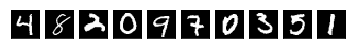

In [25]:
%matplotlib inline

f, axes = plt.subplots (1,10)
for ax in axes.ravel():
    ax.imshow ( X_train [np.random.randint ( 60000 )], cmap ="gray")
    ax.get_xaxis ().set_visible (False)
    ax.get_yaxis ().set_visible (False)
plt.show()

In [26]:
#X_train = X_train.reshape ( X_train . shape [0], 28 , 28 , 1)
#X_test = X_test.reshape ( X_test . shape [0], 28 , 28 , 1)
#
#from keras.utils import to_categorical
#Y_train_ohe = to_categorical ( Y_train , num_classes =10)
#Y_test_ohe = to_categorical (Y_test , num_classes =10)

In [27]:
X_train = X_train.reshape ( X_train.shape [0], 28 , 28 , 1)/255.
X_test = X_test.reshape ( X_test.shape [0], 28 , 28 , 1)/255.

from keras.utils import to_categorical
Y_train_ohe = to_categorical(Y_train, num_classes=10)
Y_test_ohe = to_categorical(Y_test, num_classes=10)

In [28]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(5,5), padding="same", activation="relu", input_shape= (28,28,1)))
model.add(MaxPooling2D(padding="same"))
model.add(Flatten())
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, Y_train_ohe, epochs=10, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.7188 - acc: 0.8255
Epoch 2/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2842 - acc: 0.9179
Epoch 3/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2279 - acc: 0.9341
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1924 - acc: 0.9445
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1659 - acc: 0.9520
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1460 - acc: 0.9580
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1308 - acc: 0.9628
Epoch 8/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1182 - acc: 0.9658
Epoch 9/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1079 - acc: 0.9685
Epoch 10/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0994 - acc: 0.9715

In [26]:
model.evaluate (X_test , Y_test_ohe ) # Imprime [0.0671 , 0. 9808 ]


10000/10000 [==============================] - 4s 393us/step


[0.09624678705409169, 0.9726]

### 4.4.3 Redes neuronales convolucionales profundas en Keras: Reconocimiento de objetos en imágenes a color

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

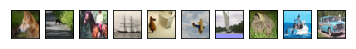

In [31]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

f, axes = plt.subplots(1,10)

for ax in axes.ravel():
    ax.imshow(X_train[np.random.randint(50000)])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [32]:
from keras.utils import to_categorical

X_train = X_train/255.
X_test = X_test/255.

Y_train_ohe = to_categorical(Y_train, num_classes=10)
Y_test_ohe = to_categorical(Y_test, num_classes=10)

In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation="relu",  input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [34]:
model.compile( loss ="categorical_crossentropy", optimizer ="RMSprop", metrics=["accuracy"])

In [35]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [7]:
model.fit ( X_train , Y_train_ohe , nb_epoch= 10 , batch_size =100)

/usr/local/lib/python3.5/dist-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
50000/50000 [==============================] - 163s - loss: 1.6999 - acc: 0.3842   
Epoch 2/10
50000/50000 [==============================] - 160s - loss: 1.2627 - acc: 0.5522   
Epoch 3/10
50000/50000 [==============================] - 164s - loss: 1.0602 - acc: 0.6286   
Epoch 4/10
50000/50000 [==============================] - 158s - loss: 0.9316 - acc: 0.6738   
Epoch 5/10
50000/50000 [==============================] - 156s - loss: 0.8516 - acc: 0.7043   
Epoch 6/10
50000/50000 [==============================] - 158s - loss: 0.7969 - acc: 0.7229   
Epoch 7/10
50000/50000 [==============================] - 158s - loss: 0.7655 - acc: 0.7358   
Epoch 8/10
50000/50000 [==============================] - 158s - loss: 0.7434 - acc: 0.7453   
Epoch 9/10
50000/50000 [==============================] - 161s - loss: 0.7346 - acc: 0.7502   
Epoch 10/10
50000/50000 [==============================] - 164s - loss: 0.7189 - acc: 0.7579   


In [7]:
print(model.evaluate(X_test, Y_test_ohe)) #Imprime [0.68015, 0.7848]

 9824/10000 [============================>.] - ETA: 0s[0.62383600907325742, 0.79049999999999998]


In [8]:
model.save("CIFAR10_trained_lat")

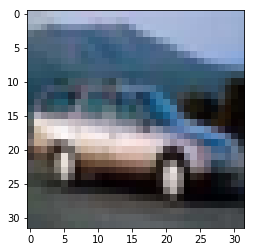

(1, 32, 32, 32)


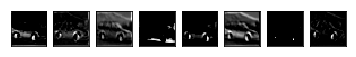

In [10]:
def get_activations(model, layer_idx, X_batch):
    from keras import backend as K
    
    inp = model.input                                          
    outputs = [layer.output for layer in model.layers]          
    functors = [K.function([inp]+ [K.learning_phase()], [out]) for out in outputs]  

    return functors[layer_idx]((X_batch, 1.))[0]

fmaps = get_activations(model, 0, X_train[4:5])

plt.imshow(X_train[4], interpolation="None")
plt.show()

print (fmaps.shape) #Imprime (1L, 32L, 32L, 32L)

f, axes = plt.subplots(1,8)
i = 0

for ax in axes.ravel():
        
    ax.imshow(fmaps[0,:,:,i], cmap="gray", interpolation="None")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    i = i+1
    
plt.show()

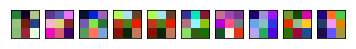

In [19]:
f, axes = plt.subplots(1,10)

for ax in axes.ravel():
    idx = np.random.randint(32)
    kernels = model.layers[0].get_weights()[0][:,:,:, idx]
    kernels -= np.min(kernels)
    kernels = kernels/np.max(kernels)
    ax.imshow(kernels)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()